# Wave divisor function: $\sigma_{0}(x)$

The integer divisor function can be described as a summation of repeating waves. Each wave filters out numbers. Divisor wave $\mathbb{X}=7$ wil filter: 7, 14, 21, 28, 35 etc. The divisor function can bescribed as:

$$ \sigma_{0}(x)=\sum_{\mathbb{X}=2}^{\infty}\cos^{N} \left( \frac{\pi}{\mathbb{X}}x \right)$$

$N$ should be a positive even integer, only then positive pulses occur. If $N\rightarrow\infty$ discrete pulses occur on the intervals determined by: $\mathbb{X}$. This definition of the divisor function does not take 1 in account, for the conventional definition 1 should be added to the wave divisor function.

With help of Euler’s formula and the binomial theorem the function can be rewritten as:

$$ \sigma_{0}(x)=\sum_{\mathbb{X}=2}^{\infty}e^{i\left( \frac{N\pi}{\mathbb{X}}x \right)} 2^{(-N)} \sum_{k=0}^{N} \binom{N}{k} e^{-i\left( \frac{\pi}{\mathbb{X}}kx \right)}  $$

The solution for the divisor function occurs when the angular component is 0 only then pulses of magnitude 1 occur. For the divisor function we can set: $e^{i\left( \frac{N\pi}{\mathbb{X}}x \right)}=1$. So the "Wave Divisor Function" becomes:

$$ \sigma_{0}(x)=\sum_{\mathbb{X}=2}^{\infty} 2^{(-N)} \sum_{k=0}^{N} \binom{N}{k} e^{-i\left( \frac{\pi}{\mathbb{X}}kx \right)}  $$

The n choose k notation can be writen in a trigiometric formulation.

$$ \Re(\sigma_{0})=\sum_{\mathbb{X}=2}^{\infty}\cos^{N} \left( \frac{\pi}{\mathbb{X}}x \right) \cos \left( \frac{N\pi}{\mathbb{X}}x  \right) $$

$$ \Im(\sigma_{0})=-i \sum_{\mathbb{X}=2}^{\infty}\cos^{N} \left( \frac{\pi}{\mathbb{X}}x \right) \sin \left( \frac{N\pi}{\mathbb{X}}x  \right) $$

This is only valid with the following criteria:

$$ \cos^{2} \left( \frac{N\pi}{\mathbb{X}}x  \right) + \sin^{2} \left( \frac{N\pi}{\mathbb{X}}x  \right)=1$$

Thus the solution of the divisor function is only valid for integer values of $x$. The wave divisor function consists of repeating wave packages with different different frequencies. The wave divisor function will have an error. It appears that the error is dependant upon the pulse width. N determines the pulse width of the individual wave packages.

More information: [pdf Google Drive][1]

[1]: https://drive.google.com/open?id=1Etu4vOfjsnbaysk_UR6HIA9R7EDybH-n

# N the pulsewidth definition.

The wave divisor function consists of repeating wave packages. The width of a wave package can be described as the pulse height $L$ at $\Delta x$:

$$ \cos^{N} \left( \frac{\pi}{\mathbb{X}} \Delta x \right)=L$$

So N can be calculated, we can determine $N(\mathbb{X})$ for every divisor wave. Note that N should be an even number else negative pulses can occur. Note that the rounding to it's closest even number has a randomizing effect.

$$ N(\mathbb{X})= \frac{\log (L)}{\log \left(  \cos \left(  \frac {\pi}{\mathbb{X} } \Delta x  \right)\right)}  \quad N \in 2 \mathbb{N} $$

For $(\mathbb{X} \rightarrow \infty)$ N can be approximated as Taylor series (see link):

$$ N(\mathbb{X}) =   \frac{\log(L)}{\log \left(  \cos \left(  \frac {\pi}{\mathbb{X} } \Delta x  \right)      \right)} \approx - \frac{2 \mathbb{X}^2 \log(L)}{\pi^2 \Delta x^2} + \frac{\log(L)}{3}+ \mathcal{O} \left( \frac{1}{\mathbb{X}^2} \right)$$

More information: [pdf Google Drive][1], [Wolfram Alpha][2].

[1]: https://drive.google.com/open?id=1Etu4vOfjsnbaysk_UR6HIA9R7EDybH-n
[2]: https://www.wolframalpha.com/input/?i=ln%28L%29%2F%28ln%28cos%28pi*delta%2FX%29%29%29+as+X-%3Einfinity

# Simulation of Wave Divisor Function.

Below is a simulation of the wave divisor function. The real solution of the divisor count is displayed for the number $x=1 \space to \space  x=100$. The number of divisor waves can be selected and the pulse width can be set $L, \space \Delta x$. With small pulse width like: $\Delta x=0.25, \space L=0.5$ individual wave packages are identified for every number (zoom in).

In [1]:
import ipywidgets as widgets
import matplotlib.pyplot as plt1
import matplotlib.pyplot as plt2
import matplotlib.pyplot as plt3
import matplotlib.pyplot as plt4
import matplotlib.pyplot as plt5
import matplotlib.pyplot as plt6

import numpy as np

from operator import add
from operator import sub
from operator import mul
from operator import truediv

from IPython.display import display

In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


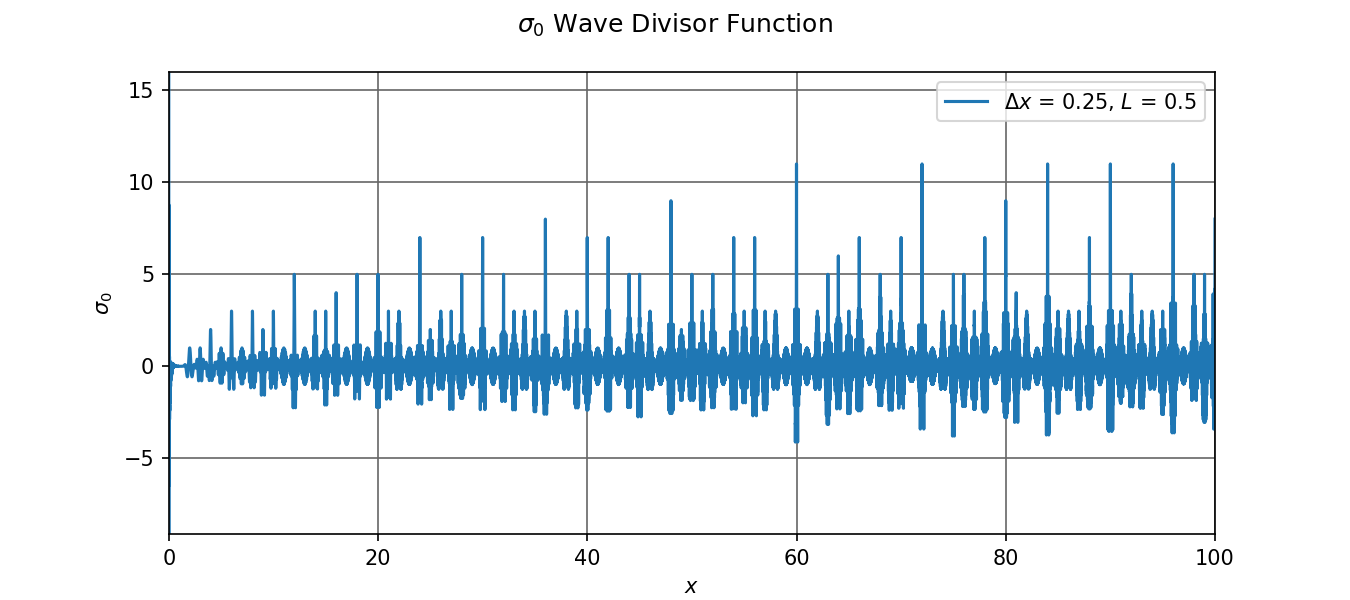

Options:
L is pulse height at dx
Select number of divisors waves (use: <Ctrl> or <Alt> to select multiples.)


interactive(children=(FloatSlider(value=0.25, description='$\\Delta x$:', max=0.99, min=0.15, step=0.01), Floa…

In [3]:
x1 = np.linspace(0, 100, 40001)
fig, ax1 = plt1.subplots(1, figsize=(9, 4))
plt1.suptitle('$\sigma_{0}$ Wave Divisor Function')

def update_plot(dx, L, wave):
    
    ax1.clear()
    
    #Set zero list
    y=[0]*40001
    
    #Calc Re divisor solution for all selected divisor waves
    for w in wave:
        N=-2*(w**2)*np.log(L)/((np.pi**2)*(dx**2))
        N=2*round(0.5*N,0)
        yw = ((np.cos(x1*np.pi/w))**N)*(np.cos(np.pi*N*x1/w))
        y=list(map(add, y, yw) )
    
    #Determine scaling for y axis (x=0 is excluded)
    countMax=max(y[int(40001*(2)/100):40001])
    countMin=min(y[int(40001*(2)/100):40001])
    
    units = '$\Delta x$ = {}, $L$ = {}'
    
    #update graph
    ax1.plot(x1, y, label=units.format(dx, L))
    ax1.axis([0, 100, countMin-5,countMax+5])
    ax1.legend(loc=1)
    ax1.set_xlabel('$x$')
    ax1.set_ylabel('$\sigma_{0}$')
    ax1.grid(b=True, which='major', color='#666666', linestyle='-')
    plt1.show()

print("Options:")
print("L is pulse height at dx")
print("Select number of divisors waves (use: <Ctrl> or <Alt> to select multiples.)")

dx = widgets.FloatSlider(min=0.15, max=0.99, value=0.25, step=0.01, description='$\Delta x$:')
L = widgets.FloatSlider(min=0.15, max=0.99, value=0.5, step=0.01, description='$L$:')
wave = widgets.SelectMultiple(options=list(range(2,101)), value=list(range(2,101)), description="$\mathbb{X}$:")   

widgets.interactive(update_plot, dx=dx, L=L, wave=wave)

# Oribitals of numbers.


Every number can be seen as a path in the $\Re, \space \Im$ plane. Prime numbers will only have one frequency. Numbers with more divisors will have an unique resonation. When the pulse width is small enough like: $\Delta x=0.25, \space L=0.5$ the effect of neigbour pulses is neglactable and the resonance curve can be displayed. The Orbital is displayed between: $(x-0.5)\le x \le (x+0.5)$. The black dot indicates the divisor count.

<IPython.core.display.Javascript object>


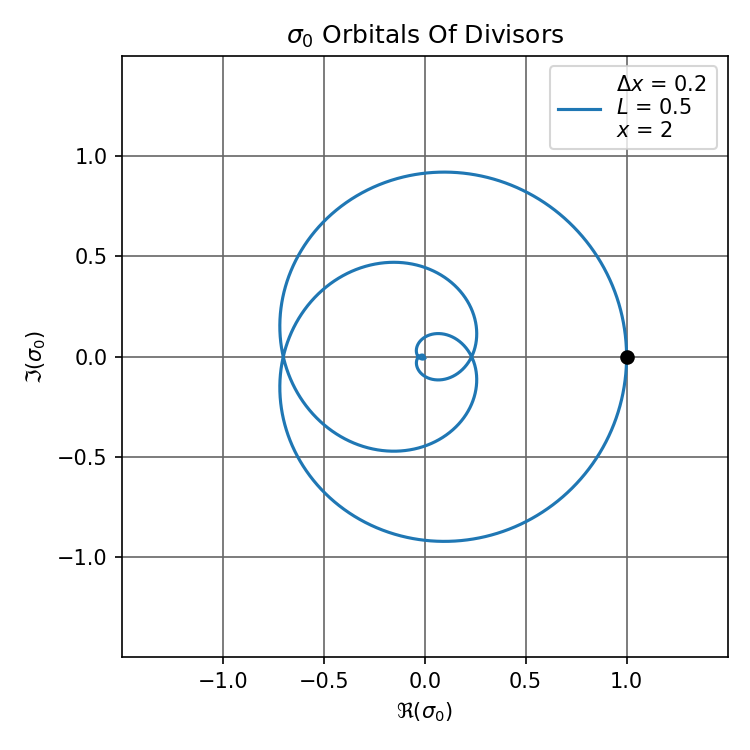

Options:
L is pulse height at dx.
Select x to display orbital.


interactive(children=(Dropdown(description='$\\Delta x$:', index=2, options=(0.1, 0.15, 0.2, 0.25, 0.3, 0.35, …

In [4]:
fig, ax2= plt2.subplots(1, figsize=(5, 5))
#plt2.suptitle('$\sigma_{0}$ Orbitals Of Divisors')


def update_plot(dx2, L2, sx):
    
    #Set x range (x-0.5)<x<(x+0.5)
    xf=np.linspace(sx-0.5,sx+0.5,7500,endpoint=True)
    
    ax2.clear()
    
    reD=[0]*7501
    imD=[0]*7501   
    
    #Create list with waves X=2 to X=100
    wave2=list(range(2,101))
    
    for w2 in wave2:
  
        N2=-2*(w2**2)*np.log(L2)/((np.pi**2)*(dx2**2))
        N2=2*round(0.5*N2,0)
        
        reDw = ((np.cos(xf*np.pi/w2))**N2)*(np.cos(np.pi*N2*xf/w2))
        imDw = (-(np.cos(xf*np.pi/w2))**N2)*(np.sin(np.pi*N2*xf/w2))
        
        reD=list(map(add, reD, reDw))
        imD=list(map(add, imD, imDw))
        
    units2 = '$\Delta x$ = {} \n$L$ = {} \n$x$ = {}'
    
    countD=max(reD)
 
    ax2.plot(reD, imD, label=units2.format(dx2, L2, sx))
    ax2.legend(loc=1)
    ax2.set_title('$\sigma_{0}$ Orbitals Of Divisors')
    ax2.set_xlabel('$\Re (\sigma_{0})$')
    ax2.set_ylabel('$\Im (\sigma_{0})$')
    ax2.axis([-(countD+0.5), (countD+0.5), -(countD+0.5),(countD+0.5)])
    ax2.plot([countD],[0], color='black', marker='o')
    ax2.grid(b=True, which='major', color='#666666', linestyle='-')
    
    plt2.tight_layout()
    plt2.show()
    
print("Options:")
print("L is pulse height at dx.")
print("Select x to display orbital.")

dx2 = widgets.Dropdown(options=[0.10,0.15, 0.20,0.25,0.30,0.35,0.40,0.45,0.5], value=0.2, description='$\Delta x$:')  
L2 = widgets.Dropdown(options=[0.10,0.15, 0.20,0.25,0.30,0.35,0.40,0.45,0.5], value=0.5, description='$L$:') 
sx = widgets.Dropdown(options=list(range(2,101)), description='$x$:')   

widgets.interactive(update_plot, dx2=dx2, L2=L2, sx=sx)



# Wavepulse outline.

The wave divisor function consists of a pulse outline modulated with a high frequency component. The real solution of the wave divisor function is:

$$ \Re(\sigma_{0})=\sum_{\mathbb{X}=2}^{\infty}\cos^{N} \left( \frac{\pi}{\mathbb{X}}x \right) \cos \left( \frac{N\pi}{\mathbb{X}}x  \right) $$

The first term $cos^N$ can also be simplified, this is the pulse outline. The pulse outline forms a bell shaped distribution arround the origin for $\mathbb{X} \rightarrow \infty$:

$$ O(x)=\lim_{\mathbb{X} \rightarrow \infty}\cos^{N} \left( \frac{\pi}{\mathbb{X}}x \right)= e^{a x^{2}}$$

$$ a=\frac{\log(L) \space}{\Delta x^{2}}=constant$$

The high frequency component $HF(\mathbb{X})$ scales linear with $\mathbb{X}$ (see link for more information) for: $\mathbb{X} \rightarrow \infty$. 

$$ HF(\mathbb{X})= \cos \left( \frac{N\pi}{\mathbb{X}} x \right) \approx \cos (b x)$$

$$ b(\mathbb{X}) = \frac{N}{\mathbb{X}}\pi \approx  - \frac{2 \space \log(L)}{\pi \space \Delta x^{2}} \mathbb{X} = constant \cdot \mathbb{X}$$

So for $\mathbb{X} \rightarrow \infty$ the wave divisor function becomes:

$$ \Re(\sigma_{0})\rightarrow \sum_{\mathbb{X}=2}^{\infty}e^{a x^{2}} \cos (b x) $$

Below an example of the Wavepulse outline. Note that $N(\mathbb{X})$ should be an even integer (only then positive pulses). Though arround the origin $N(\mathbb{X})$ can be seen continuous there $\cos^{N}$ is always positive. The randomizing effect of rounding $N(\mathbb{X})$ to it's closest even number can also be observed.

More information:
[pdf Google Drive][1], 
[Wofram Alpha][2]

[1]: https://drive.google.com/open?id=1Etu4vOfjsnbaysk_UR6HIA9R7EDybH-n
[2]: https://www.wolframalpha.com/input/?i=limit+ln(L)*ln(cos(m*pi/X))/ln(cos(pi*Delta/X))+as+X-%3Einfinity


<IPython.core.display.Javascript object>


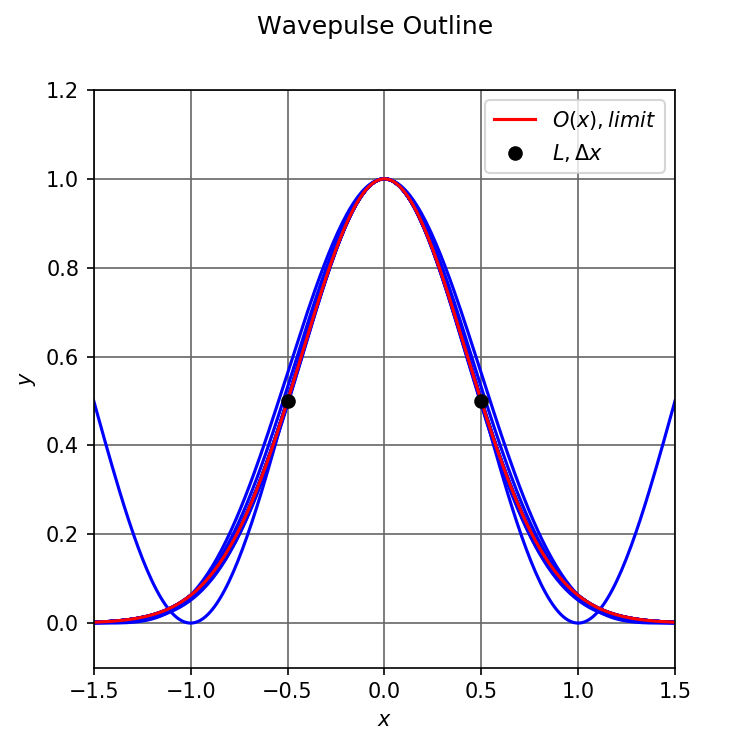

Options:
L is pulse height at dx.
Select Waves X.


interactive(children=(FloatSlider(value=0.5, description='$\\Delta x$:', max=0.99, min=0.15, step=0.01), Float…

In [5]:
x3 = np.linspace(-1.5, 1.5, 251)
fig, ax3= plt3.subplots(1, figsize=(5, 5))
plt3.suptitle('Wavepulse Outline')

def update_plot(dx3, L3, divX, Ntyp):
 
    ax3.clear()
    
    for w3 in divX:
  
        #N3=-2*(w3**2)*np.log(L3)/((np.pi**2)*(dx3**2))
        N3=(np.log(L3))/(np.log(np.cos(np.pi*dx3/w3)))

        if Ntyp=="Even":
            N3=2*round(0.5*N3,0)

        y3 =((np.cos(x3*np.pi/w3))**N3)
        ax3.plot(x3, y3, color='b', linestyle='-')

    #Plot wavepulse outline
    ylimit=np.exp(np.log(L3)*(x3**2)/(dx3**2))
    ax3.plot(x3, ylimit, label='$O(x), limit$', color='r', linestyle='-')
    ax3.plot(dx3,L3, color='black', marker='o', linestyle='', label='$L, \Delta x$')
    ax3.plot(-dx3,L3, color='black', marker='o')
    
    ax3.legend(loc=1)
    ax3.set_xlabel('$x$')
    ax3.set_ylabel('$y$')
    ax3.axis([-1.5, 1.5, -0.1, 1.2])
    ax3.grid(b=True, which='major', color='#666666', linestyle='-')
    plt3.show()

print("Options:")
print("L is pulse height at dx.")
print("Select Waves X.")

Ntyp =widgets.Dropdown(options=["Even", "Continuo"], value="Even", description='$N$:')
dx3 = widgets.FloatSlider(min=0.15, max=0.99, value=0.5, step=0.01, description='$\Delta x$:')
L3 = widgets.FloatSlider(min=0.15, max=0.99, value=0.5, step=0.01, description='$L$:')
divX = widgets.SelectMultiple(options=list(range(2,21)), value=list(range(2,21)), description="$\mathbb{X}$:")  

widgets.interactive(update_plot, dx3=dx3, L3=L3, divX=divX, Ntyp=Ntyp)

# Error of the Wave Divisor Function.

The error of the wave divisor function is majorly determined by neighbour pulses like: $\sigma(x-1)$ and $\sigma(x+1)$. The maximum error from a direct neighbour can be determined from the wavepulse outline: 

$$ max(\varepsilon)=exp \left( \frac{\log(L)}{\Delta x^2}      \right)$$

There will also be an arror caused by $\sigma(x-m)$ and $\sigma(x+m)$. For pulses m steps away from $x$ the maximum error is:

$$ \varepsilon(m)=exp \left( \frac{\log(L)}{\Delta x^2}   m^{2}   \right)$$

The high frequency component $HF(\mathbb{X})$ scales linear with $\mathbb{X}$ (see link for more information). This linear dependance will result in a arcsine distribution only if the divisors at $\sigma(x-1)$ and $\sigma(x+1)$ are random distributed, which is supposed true for large numbers. Note that $N(\mathbb{X})$ also is a randomizing factor while it's rounded to it's closest even number. 

$$ HF(\mathbb{X})= \cos \left( \frac{N\pi}{\mathbb{X}} \right) \approx \cos (\alpha \mathbb{X})$$

The statistical variation of the arcsine distribution for direct neighbour pulses is determined as:

$$ Var(\mathbb{X})=\frac{1}{2} \cdot  max^{2}(\varepsilon)$$

For other divisors m steps away:

$$ Var(\mathbb{X})=\frac{1}{2} \cdot  \varepsilon^{2}(m)$$

It appears that the error follows a random walk over an arcsine distribution. The total number of neighbour divisors determine the total variation. The total error will be the contribution of direct and neighbour pulses:

$$ Var(\sigma_{0}(x)) =\frac{1}{2} max^{2}(\varepsilon) \left( \sum_{m=1}^{\infty} \frac{\sigma_{0}(x+m) \cdot \varepsilon^{2} (m)}{max^{2}(\varepsilon)}   +  \sum_{m=1}^{\infty} \frac{\sigma_{0}(x-m) \cdot \varepsilon^{2} (m)}{max^{2}(\varepsilon)}    \right)$$

Though, for narrow pulse widths it is found that the total error converges to direct neighbour divisors/pulses (see link with more information). The above relation actually takes an sort of average of the divisor count, so:

$$ Var(\sigma_{0}(x)) \approx  max^{2}(\varepsilon) \cdot \overline{\sigma_{0}(x)} $$

The mean divisor growth is defined by Dirichlet. For now we do not included the error term $\mathcal{O}(x^{\Theta^{*}})$. Note that an extra $(-1)$ is added the wave divisor function is excluding divisor: 1.

$$ \overline{ D(x)} \approx \log(x) + 2 \gamma -1 -(1)$$

The error is proportional to the divisor count and the divisor count is proportional to: $\sim log(x)$ for large numbers. The standard deviation in the wave divisor function than is then proportional to:

$$ Stdev(\sigma_{0}) \approx max(\varepsilon) \cdot \sqrt{\log(x)+ 2 \gamma -2}$$

The error will grow very slowly proportional to: $\sqrt{\log(x)}$.


More information: [pdf Google Drive][1], [Wolfram Alpha][2], [Openturns Github][3], [Wolfram Divisor Function][4]

[1]: https://drive.google.com/open?id=1Etu4vOfjsnbaysk_UR6HIA9R7EDybH-n
[2]: https://www.wolframalpha.com/input/?i=pi*ln(L)/(X^2*ln(cos(pi*delta/X)))+as+X-%3Einfinity
[3]: http://openturns.github.io/openturns/1.9/user_manual/_generated/openturns.Arcsine.html
[4]: http://mathworld.wolfram.com/DivisorFunction.html

# Error simulation.

The error in the divisor function can be calculated by substracting the wave divisor function from the real divisor count:

$$ \varepsilon (x) = \sigma_{0}(x)_{Wave} - \sigma_{0}(x)_{Discrete}$$

The error is calculated while: $L$, $\Delta x$ and the number range can be given. Optionally the $3 Stdev_{\sigma_{0}}(x)$ lines can be included determining 99.7% of the error. For small: $L$, $\Delta x$ the error will result in <0>, the error is then to small to be calculated.

<IPython.core.display.Javascript object>


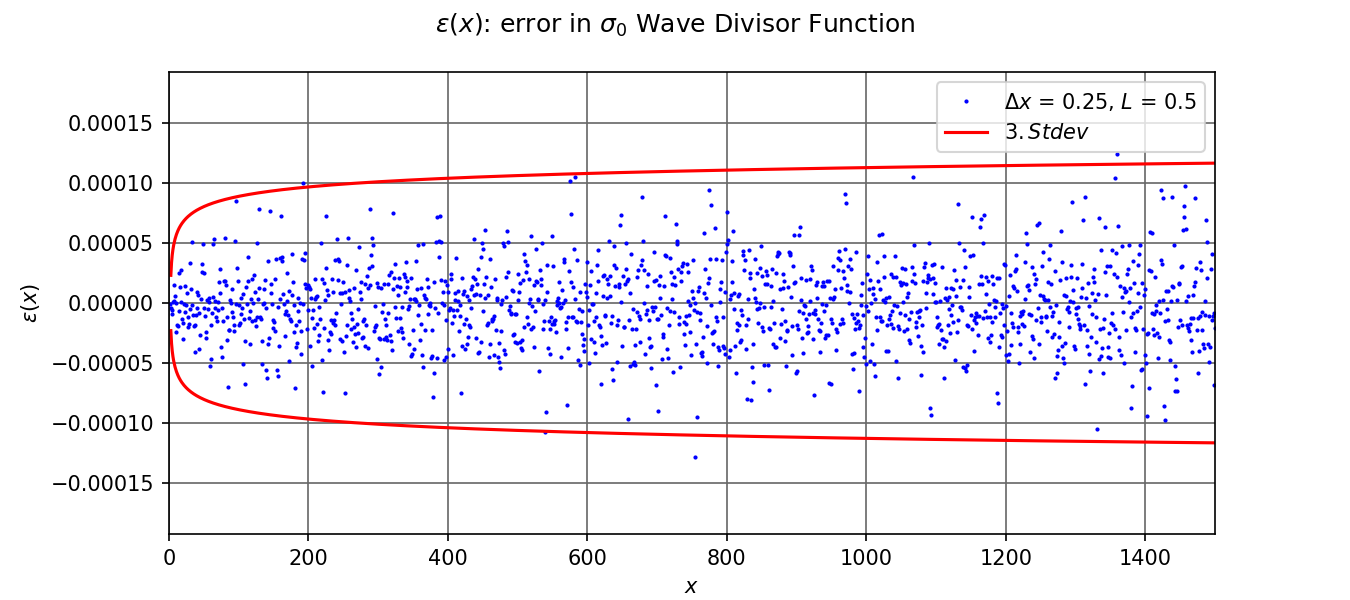

Options:
L is pulse height at dx
Select number of divisors waves.


interactive(children=(Dropdown(description='$\\Delta x$:', index=3, options=(0.1, 0.15, 0.2, 0.25, 0.3, 0.35, …

In [6]:
"""
The error in the divisor count is determined.
The discrete divisor count is calculated (modules). And the wave divisor count is calculated.
Numbers 0 and 1 are not included in the divisor count.
"""

from ipywidgets import IntProgress

fig, ax4 = plt4.subplots(1, figsize=(9, 4))
plt4.suptitle('$\epsilon(x)$: error in $\sigma_{0}$ Wave Divisor Function')

def update_plot(dx4, L4, max4,Typ):

    #Instantiate progress bar
    f = IntProgress(min=0, max=3*max4, description="")
    display(f)

    #Clear Graph
    ax4.clear()
    
    #Discrete divisor count variables
    #xD = np.linspace(2,max4,max4-1)
    yD=[]
    yDD=[0]*(max4+1)

    #Wave divisor function variables
    x4 = np.linspace(2,max4,max4-1)
    y4=[0]*(max4-1)
    
    #loop trought all values between 2 and maximum    
    for w4 in range(2,max4):    

        #Determine Discrete Divisor Count
        for i in range(2,max4+1):
            if (i%w4)==0:
                yD.append(1)
            else:
                yD.append(0)
        
        #Update progressbar.
        if w4%50==0:
            f.value += 50*(3*0.9)
            
        yDD=list(map(add, yDD, yD))
        yD=[]
        
        #Determine Wave Divisor Count.
        #N4=-2*(w4**2)*np.log(L4)/((np.pi**2)*(dx4**2))
        N4=(np.log(L4))/(np.log(np.cos(np.pi*dx4/w4)))
        N4=2*round(0.5*N4,0)
        
        yw4 = ((np.cos(x4*np.pi/(w4)))**N4)*(np.cos(np.pi*N4*x4/(w4)))
        #yw4 = ((np.cos(x4*np.pi/(w4)))**N4)*(np.cos(-2*np.log(L4)*x4*w4/(np.pi*dx4**2)))
                
        y4=list(map(add, y4, yw4))
        
    #Determine the error [Wave]-[Discrete]
    err=[] 
    err=list(map(sub, y4, yDD))
    f.value += max4/10
    
    #Growth Plot Sqrt(ln(x))
    if Typ=="On":
        xG = np.linspace(3,max4,max4-1)
        em=np.exp(np.log(L4)/(dx4**2))
        yGpos=np.sqrt(np.log(xG)-0.84558)*em*3
        yGneg=-np.sqrt(np.log(xG)-0.84558)*em*3
    
    #Determine maximum error.
    merr=max([max(err),abs(min(err))])

    #Count how many outsite CI
    
    #set counter 0
    ct=0
    #error max
    em=np.exp(np.log(L4)/(dx4**2))

    
    for i in range(1, max4-1):
        
        #ub upperbound and lowerbound
        UB=np.sqrt(np.log(i+3)-0.84558)*em*3
        LB=-np.sqrt(np.log(i+3)-0.84558)*em*3    
        
        if err[i]>UB or err[i]<LB:
            ct=ct+1
        
        
    print("Outside CI: " + str(ct))
    print("Within CI (99.7%): " + str(100-100*ct/max4) +" %")
    
    #Plot error update graph
    units4 = '$\Delta x$ = {}, $L$ = {}'
    ax4.plot(x4, err, color='blue', marker='.', markersize=2 ,linestyle='' ,label=units4.format(dx4, L4))

    #Plot error growth
    unitse = '$3.Stdev$'
    
    if Typ=="On":
        ax4.plot(xG, yGpos, color='red', linestyle='-' ,label=unitse)
        ax4.plot(xG, yGneg, color='red', linestyle='-' )
    
    #Set scaling and exis
    ax4.axis([0, max4, -(merr+0.5*merr) , (merr+0.5*merr) ])
    ax4.legend(loc=0)
    ax4.set_xlabel('$x$')
    ax4.set_ylabel('$\epsilon(x)$')
    ax4.grid(b=True, which='major', color='#666666', linestyle='-')
    plt4.show()
     
        
        
    
    f.value += max4/10
    f.close()

print("Options:")
print("L is pulse height at dx")
print("Select number of divisors waves.")

dx4 = widgets.Dropdown(options=[0.10,0.15, 0.20,0.25,0.30,0.35,0.40,0.45,0.5], value=0.25, description='$\Delta x$:')  
#dx4 = widgets.BoundedFloatText(value=0.5, description='$\delta x$:') 
L4 = widgets.Dropdown(options=[0.10,0.15, 0.20,0.25,0.30,0.35,0.40,0.45,0.5], value=0.5, description='$L$:') 
max4 = widgets.Dropdown(options=list(range(500,50500,500)), value=1500, description='$Range$:') 
Typ =widgets.Dropdown(options=["None", "On"], value="On", description='$3 \sigma$:')

widgets.interactive(update_plot, dx4=dx4, L4=L4, max4=max4, Typ=Typ)

# Mean divisor function growth.

A mean of the divisor growth is proportional to the variation of the error in the wave divisor function.

$$ Var(\sigma_{0}) \approx  max^{2}(\varepsilon) \cdot \overline{ \sigma_{0}(x)} $$

For every position $x$ we can calculate the error $\varepsilon(x)$ for $n$ pulsewidth settings. For all these $\varepsilon(x)$'s we calculate the $Var(\varepsilon)$. Also smaller error's will contribute where: $\Delta x, L$ are small, while the error is divided by: $max(\varepsilon)$, like a normalization. A mean of the divisor count can be caluculated:

$$ \overline {\sigma_{0}(x)} \approx \frac{Var(\sigma_{0})}{max^{2}(\varepsilon)} = \sum_{\Delta x,L}^{n} \left( \frac { \varepsilon(x)}{max(\varepsilon)}  \right)^{2} \bigg / {(n-1)}$$

From Dirichlet we have the following formula for the mean divisor count plus an error. Note that we here use $\Theta^{*}$ this value is different than the divisor summatory function.

$$ \overline {\sigma_{0}(x)} = \log(x) + 2 \gamma -2 + \mathcal{O}(x^{\Theta^{*}})$$

This way we can calculate the error $\mathcal{O}(x^{\Theta^{*}})$ in the divisor function. So:

$$ \mathcal{O}(x^{\Theta^{*}}) = \left( \sum_{\Delta x,L}^{n} \left( \frac { \varepsilon(x)}{max(\varepsilon)}  \right)^{2} \bigg / {(n-1)} \right) - (\log(x) + 2 \gamma -2)$$

Note that this is only valid for narrow pulsewidths of the wave divisor function.

More information: [Article James Cann][1], [Divisor Summatory Problems][2]

[1]: http://chalkdustmagazine.com/features/can-count-dirichlet/
[2]: https://en.wikipedia.org/wiki/Divisor_summatory_function


# Determine $\Theta^{*}$.

Next we will calculate the error in the divisor summatory function: $\mathcal{O}(x^{\Theta^{*}})$. This is done in the next cell.

For every number x the error in the wave divisor function can be calculated for various pulse widths. We can select a puldewidth range, we set $L=0.5$ the pulsewidth can be varied between: $\Delta x_{min}$ and $\Delta x _{max}$. We can select how many divisor waves $n$ are used in this range.

There is a limit how narrow the pulsewidth can be selected. With $L=0.5$ and $\Delta x_{min}=0.15$ the computer can just handle the number of decimals.

The error at every $x$ is calculated (error between wave and discrete) in this case till $n$ errors per x. The variation in the error is then determined, from which we get an mean divisor growth. The error $\mathcal{O}(x^{\Theta^{*}})$ in the divisor growth can then be fitted with a function:

$$ Fit=(x-a)^{\Theta^{*}}-1$$

The fit will give us a fitted: $\Theta^{*}$ in the selected range $x$. In the simulation $a$ was set constant at -1.5 this way only $\Theta^{*}$ is fitted.

<IPython.core.display.Javascript object>


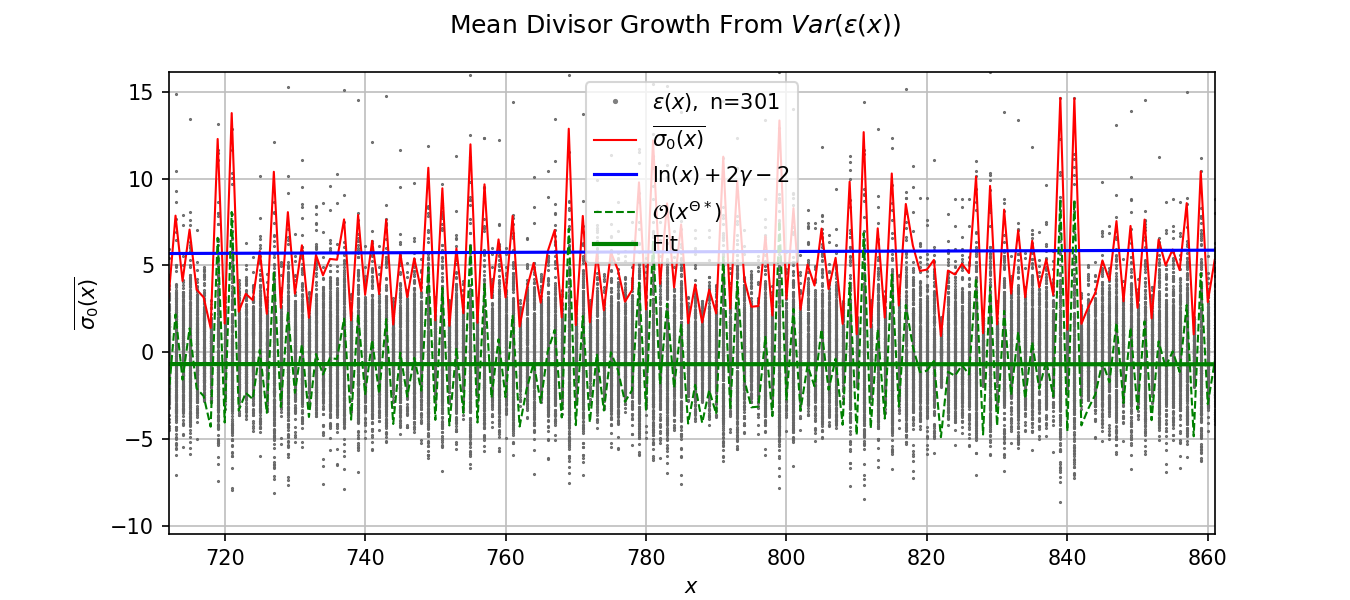

Options:
L is pulse height at dx, Select multiple numbers dx, use: <Ctrl> and/or <Alt>.


interactive(children=(Dropdown(description='$n$:', index=2, options=(100, 200, 300, 400, 500, 600, 700, 800, 9…

In [7]:
"""
The error in the divisor count is determined.
The discrete divisor count is calculated (modules). And the wave divisor count is calculated.
Numbers 0 and 1 are not included in the divisor count.
"""

from ipywidgets import IntProgress
from scipy import optimize

fig, ax5 = plt5.subplots(1, figsize=(9, 4))
plt5.suptitle('Mean Divisor Growth From $Var(\epsilon(x))$')
              
def update_plot(n,dxmin, dxmax, L5, max5):

    #Create list with all values for dx.
    dx5=[]
    for i in list(range(1, n+2, 1)):
        dx5.append((dxmin+(i-1)*(dxmax -dxmin)/n))   
    
    #Instantiate progress bar
    f = IntProgress(min=0, max=len(dx5), description="")
    display(f)
   
    #Clear Graph
    ax5.clear()
    
    #Error
    err=[] 

    #Discrete divisor count variables
    #xD = np.linspace(2,max4,max4-1)
    yD=[]
    yDD=[0]*(max5+1)

    #loop trought all values between 2 and maximum    
    for w5 in range(2,max5):
        #Determine Discrete Divisor Count
        for i in range(2,max5+1):
            if (i%w5)==0:
                yD.append(1)
            else:
                yD.append(0)

        yDD=list(map(add, yDD, yD))
        yD=[]

    #Wave divisor function variables
    x5 = np.linspace(2,max5,max5-1)
    y5=[0]*(max5-1)
    yw5=[]

    #Variance of the error
    verrT=[0]*(max5-1)
    count=[len(dx5)-1]*(max5-1)
    
    #Loop trough all L, dx values
    for dxs in dx5:
        
        #loop trought all values between 2 and maximum    
        for w5 in range(2,max5):

            #Determine Wave Divisor Count.
            N5=(np.log(L5))/(np.log(np.cos(np.pi*dxs/w5)))
            #N5=-2*(w5**2)*np.log(L5)/((np.pi**2)*(dxs**2))
            N5=2*round(0.5*N5,0)
            yw5 = ((np.cos(x5*np.pi/(w5)))**N5)*(np.cos(np.pi*N5*x5/(w5)))
           
            
            y5=list(map(add, y5, yw5))
            yw5=[]

        #Determine the normalized error ([Wave]-[Discrete])/Max(epsilon)
        err=list(map(sub, y5, yDD))
        em=np.exp(np.log(L5)/(dxs**2))
        errV=err/em
 
        #Plot error dots in graph
        ax5.plot(x5, errV, color='#686868', marker='.', markersize=1 ,linestyle='')
        
        
        #Variance of the error [Epsilon/Max(epsilon)]^2
        verr=list(map(mul,errV,errV))
        verrT=list(map(add,verrT,verr))
    
        #Set y to zero
        y5=[0]*(max5-1)
       
        #Update progressbar.
        f.value += 1 

    #Add one extra dot with label
    label1='$\epsilon (x),$ n=' + str(len(dx5)) #str(count[0])
    ax5.plot([3],[0], color='gray', marker='.', markersize=3 ,linestyle='', label=label1)
        
    #Plot Variance
    verrT=list(map(truediv,verrT,count))
    ax5.plot(x5, verrT, color='red', linestyle='-', linewidth=1,label="$\overline {\sigma_{0}(x)}$")
    
    #Plot divisor growth ln(x)+2Gamma-2
    yGpos=(np.log(x5)+2*0.557722-2)
    ax5.plot(x5, yGpos, color='blue', linestyle='-' ,label="$\ln(x)+2\gamma-2$")
 
    #Plot Delta(x)
    yOx=list(map(sub,verrT,yGpos))
    ax5.plot(x5, yOx, color='green', marker='', markersize=5, linestyle='--' ,linewidth=1,label="$\mathcal{O}(x^{\Theta *})$")
    
    #Fit error with (x+a)^phi-1:
    params, params_covariance = optimize.curve_fit(fit_error, x5, yOx, bounds=([-1.99,1.49],[1,1.51]))
    
    residuals = yOx - fit_error(x5, params[0], params[1])
    
    #Determine R^2
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((yOx-np.mean(yOx))**2)
    r_squared = 1 - (ss_res / ss_tot)
    
    #Plot fit
    xf = np.linspace(2,max5,100)
    ax5.plot(xf, fit_error(xf, params[0], params[1]), color='green',linewidth=2, label='Fit', linestyle='-')
    print('Fit: (x-1.5)^Theta-1')
    print('Theta*: '  + str(params[0]))
    print('a*: '  + str(params[1]))
    print("R^2: " + str(r_squared))
    
    #Set scaling and exis
    ax5.legend(loc=0)
    ax5.set_xlabel('$x$')
    ax5.set_ylabel('$\overline {\sigma_{0}(x)}$')
    ax5.grid(b=True, which='major', color='#BEBEBE', linestyle='-')
    plt5.show()
 
    f.value += max5/10
    f.close()
    
def fit_error(x,b,c):
    return ((x-c)**b)-1
    
print("Options:")
print("L is pulse height at dx, Select multiple numbers dx, use: <Ctrl> and/or <Alt>.")

n= widgets.Dropdown(options=list(range(100,1100,100)), value=300, description="$n$:")
dxmin = widgets.BoundedFloatText(value=0.15, description='$\Delta x \space min$:',disabled=True) 

dxmaxl=[]
for i in list(range(1, 70, 1)):
    dxmaxl.append(round(0.16+(i-1)*(0.5 - 0.16)/68,8))

dxmaxlr=[]
for i in list(range(1, 11, 1)):
    dxmaxlr.append(round(0.151+(i-1)*(0.159 - 0.151)/8,8))
    
dxmax = widgets.Dropdown(options=(dxmaxlr+dxmaxl), value=0.2, description='$\Delta x \space max$:') 

L5 = widgets.BoundedFloatText(value=0.5, description='$L$:',disabled=True) 
max5 = widgets.Dropdown(options=(list(range(5,20,1))+list(range(20,1010,10))), value=20, description='$Range$:') 

widgets.interactive(update_plot, n=n, dxmin=dxmin, dxmax=dxmax, L5=L5, max5=max5)

# Theta as function of x, $\Theta^{*}(x)$.

For various ranges of $x$ we fitted $\Theta^{*}(x)$. The graph below shows this relation. Every datapoint $\Theta^{*}$ at range $x$ is calculated (with $n=1000$). It appears that  $\Theta^{*}(x)$ is a function of the looked at range in $x$. From the graph we can make the following observations:

**Observation 1:**

For range $x\rightarrow0$, $\Theta^{*}$ tends to go to:

$$ \Theta^{*}(x\rightarrow 0) \sim -0.5$$

**Observation 2:**

When we look at narrow pulsewidths between: $L=5$ and $\Delta x$ between $[0.150 - 0.160]$ we see a possible limit occuring, there appears to be an minumum $\Theta^{*}$. For range $x \approx 11$, $\Theta^{*}$ tends to:

$$ \Theta^{*}_{min}(x\approx 11) \sim -0.74$$

Note that this could be an actual limit value. The derived method only counts for narrow pulse widths which is here the case. For very narrow pulsewidth between $\Delta x=0.150$ and $\Delta x=0.152$ the limit curve is not followed. Likely we have to do with computable limits the number of decimals is to big.

<IPython.core.display.Javascript object>


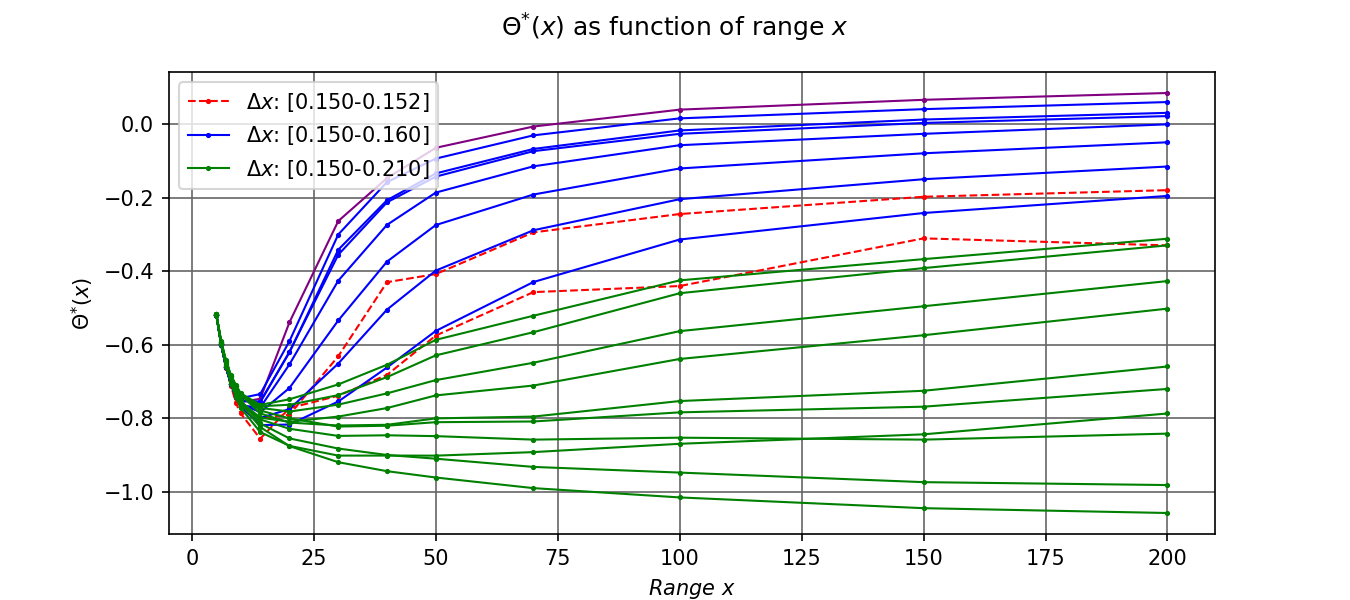

In [8]:
fig, ax6 = plt6.subplots(1, figsize=(9, 4))
plt6.suptitle('$\Theta^{*}(x)$ as function of range $x$')

ax6.clear()

xT=[5,6,7,8,9,10,14,20,30,40,50,70,100,150,200]
# All Data for n=1000

#0.15 - 0.151
yd1=[-0.5185,-0.5989,-0.6596,-0.7103,-0.7576,-0.7866,-0.8551,-0.7720,-0.7385,-0.6818,-0.5749,-0.4570,-0.4405,-0.3110,-0.3300]
#0.15 - 0.152
yd2=[-0.5186,-0.5999,-0.6631,-0.7111,-0.7449,-0.7618,-0.7995,-0.7898,-0.6313,-0.4300,-0.4080,-0.2947,-0.2449,-0.1980,-0.1800]
#0.15 -0.153
yd3=[-0.5184,-0.5990,-0.6610,-0.7065,-0.7349,-0.7526,-0.7565,-0.6191,-0.3556,-0.2130,-0.1432,-0.0741,-0.0270,0.0025,0.0212]
#0.15 - 0.154
yd4=[-0.5184,-0.5994,-0.6611,-0.7070,-0.7359,-0.7552,-0.7469,-0.5389,-0.2640,-0.1472,-0.0650,-0.0072,0.0387,0.0654,0.0839]
#0.15 - 0.155
yd5=[-0.5184,-0.5993,-0.6612,-0.7058,-0.7299,-0.7450,-0.7340,-0.5901,-0.3005,-0.1580,-0.0943,-0.0312,0.0150,0.0400,0.0593]
#0.15 - 0.156
yd6=[-0.5184,-0.5990,-0.6603,-0.7061,-0.7344,-0.7520,-0.7545,-0.6206,-0.3419,-0.2073,-0.1345,-0.0681,-0.0178,0.0118,0.0300]
#0.15 - 0.157
yd7=[-0.5183,-0.5990,-0.6613,-0.7061,-0.7348,-0.7649,-0.7707,-0.6531,-0.4259,-0.2742,-0.1866,-0.1153,-0.0579,-0.0270,-0.0012]
#0.15 - 0.158
yd8=[-0.5184,-0.5990,-0.6600,-0.7067,-0.7385,-0.7594,-0.7833,-0.7173,-0.5340,-0.3740,-0.2748,-0.1919,-0.1211,-0.0799,-0.0500]
#0.15 - 0.159
yd9=[-0.5184,-0.5980,-0.6608,-0.7070,-0.7408,-0.7640,-0.7990,-0.7746,-0.6510,-0.5044,-0.3985,-0.2890,-0.2046,-0.1503,-0.1158]
#0.15 - 0.16
yd10=[-0.5184,-0.5989,-0.6600,-0.7079,-0.7417,-0.7680,-0.8182,-0.8167,-0.7541,-0.6617,-0.5624,-0.4296,-0.3141,-0.2421,-0.1957]
#0.15 - 0.165
yd11=[-0.5180,-0.5980,-0.6594,-0.7068,-0.7420,-0.7713,-0.8371,-0.8747,-0.9011,-0.9010,-0.9012,-0.8916,-0.8690,-0.8433,-0.7867]
#0.15 - 0.17
yd12=[-0.5183,-0.5978,-0.6579,-0.7021,-0.7326,-0.7548,-0.7979,-0.8091,-0.7951,-0.7719,-0.7376,-0.7108,-0.6386,-0.5741,-0.5019]
#0.15 - 0.175
yd13=[-0.5182,-0.5969,-0.6550,-0.6997,-0.7290,-0.7538,-0.8029,-0.8282,-0.8476,-0.8459,-0.8482,-0.8577,-0.8524,-0.8577,-0.8414]
#0.15 - 0.18
yd14=[-0.5180,-0.5962,-0.6548,-0.6996,-0.7319,-0.7590,-0.8235,-0.8754,-0.9190,-0.9434,-0.9606,-0.9894,-1.0147,-1.0439,-1.0570]
#0.5 -0.185
yd15=[-0.5179,-0.5954,-0.6534,-0.6958,-0.7272,-0.7521,-0.8136,-0.8544,-0.8819,-0.8994,-0.9095,-0.9318,-0.9472,-0.9732,-0.9811]
#0.15 - 0.19
yd16=[-0.5177,-0.5947,-0.6500,-0.6915,-0.7170,-0.7389,-0.7670,-0.7630,-0.7368,-0.6878,-0.6288,-0.5659,-0.4600,-0.3917,-0.3300]
#0.15 -0.195
yd17=[-0.5174,-0.5938,-0.6477,-0.6861,-0.7107,-0.7318,-0.7633,-0.7481,-0.7078,-0.6542,-0.5866,-0.5212,-0.4251,-0.3674,-0.3120]
#0.15 -0.2
yd18=[-0.5170,-0.5925,-0.6466,-0.6860,-0.7120,-0.7349,-0.7715,-0.7815,-0.7626,-0.7320,-0.6960,-0.6489,-0.5630,-0.4954,-0.4270]
#0.15 - 0.205
yd19=[-0.5170,-0.5914,-0.6450,-0.6850,-0.7110,-0.7359,-0.7865,-0.8114,-0.8193,-0.8174,-0.8000,-0.7951,-0.7529,-0.7250,-0.6590]
#0.15 -0.21
yd20=[-0.5166,-0.5900,-0.6427,-0.6825,-0.7085,-0.7324,-0.7786,-0.8000,-0.8222,-0.8199,-0.8103,-0.8084,-0.7836,-0.7682,-0.7200]


ax6.plot(xT, yd1, marker='.',markersize=3, linestyle='--', linewidth=1, color='red')
ax6.plot(xT, yd2, marker='.',markersize=3, linestyle='--', linewidth=1, color='red',label="$\Delta x$: [0.150-0.152]")
ax6.plot(xT, yd3, marker='.',markersize=3, linestyle='-', linewidth=1, color='blue')
ax6.plot(xT, yd4, marker='.',markersize=3, linestyle='-', linewidth=1, color='purple')
ax6.plot(xT, yd5, marker='.',markersize=3, linestyle='-', linewidth=1, color='blue')
ax6.plot(xT, yd6, marker='.',markersize=3, linestyle='-', linewidth=1, color='blue')
ax6.plot(xT, yd7, marker='.',markersize=3, linestyle='-', linewidth=1, color='blue')
ax6.plot(xT, yd8, marker='.',markersize=3, linestyle='-', linewidth=1, color='blue')
ax6.plot(xT, yd9, marker='.',markersize=3, linestyle='-', linewidth=1, color='blue')
ax6.plot(xT, yd10, marker='.',markersize=3, linestyle='-', linewidth=1, color='blue',label="$\Delta x$: [0.150-0.160]")
ax6.plot(xT, yd11, marker='.',markersize=3, linestyle='-', linewidth=1, color='green')
ax6.plot(xT, yd12, marker='.',markersize=3, linestyle='-', linewidth=1, color='green')
ax6.plot(xT, yd13, marker='.',markersize=3, linestyle='-', linewidth=1, color='green')
ax6.plot(xT, yd14, marker='.',markersize=3, linestyle='-', linewidth=1, color='green')
ax6.plot(xT, yd15, marker='.',markersize=3, linestyle='-', linewidth=1, color='green')
ax6.plot(xT, yd16, marker='.',markersize=3, linestyle='-', linewidth=1, color='green')
ax6.plot(xT, yd17, marker='.',markersize=3, linestyle='-', linewidth=1, color='green')
ax6.plot(xT, yd18, marker='.',markersize=3, linestyle='-', linewidth=1, color='green')
ax6.plot(xT, yd19, marker='.',markersize=3, linestyle='-', linewidth=1, color='green')
ax6.plot(xT, yd20, marker='.',markersize=3, linestyle='-', linewidth=1, color='green', label="$\Delta x$: [0.150-0.210]")

ax6.legend(loc=2)
ax6.set_xlabel('$Range$ $x$')
ax6.set_ylabel('$\Theta^{*}(x)$')
ax6.grid(b=True, which='major', color='#666666', linestyle='-')

plt6.show()
    


# Conclusion

The error $\Theta^{*}$ in the mean divisor count was determined:

$$ \overline {\sigma_{0}(x)} = \log(x) + 2 \gamma -2 + \mathcal{O}(x^{\Theta^{*}})$$

The Divisor summatory function is the mean divisor count multiplied by: $x$:

$$ D(x) = x(\log(x) + 2 \gamma -1) + \mathcal{O}(x^{\Theta})$$

With help of the wave divisor function the error $\Theta$ in the Divisor summatory function is determined: $x^{1} \cdot x^{\Theta^{*}}=x^{1+\Theta^{*}} $, so:

$$ \Theta_{(x\rightarrow 0)} \sim 0.5$$

$$ \Theta_{min} \sim 0.26 $$

Both these values correspond to values found in literature. Though, there are many pulsewidth settings and the results vary. The achieved results are thought to be more in the catagory "luck". More analysis is needed.

More information: [Divisor Summatory][1]

[1]: https://en.wikipedia.org/wiki/Divisor_summatory_function

# Fourier Transform Wave Divisor Function.

The wave divisor function consists of a pulse outline modulated with a high frequency component. The real solution of the wave divisor function is:

$$ \Re(\sigma_{0})=\sum_{\mathbb{X}=2}^{\infty}\cos^{N} \left( \frac{\pi}{\mathbb{X}}x \right) \cos \left( \frac{N\pi}{\mathbb{X}}x  \right) $$

N is determined by the pulse width of $cos^{N}$ and calculated with ($L$ pulseheight at position $\Delta x$). For every $\mathbb{X}$ a $N$ is calculated. N should be an positive even integer to obtain positive pulses only:

$$ N(\mathbb{X}) =   \frac{\log(L)}{\log \left(  \cos \left(  \frac {\pi}{\mathbb{X} } \Delta x  \right)      \right)} \approx - \frac{2 \mathbb{X}^2 \log(L)}{\pi^2 \Delta x^2} + \frac{\log(L)}{3}+ \mathcal{O} \left( \frac{1}{\mathbb{X}^2} \right)$$

The first term $cos^N$ can also be simplified, this is the pulse outline. The pulse outline forms a bell shaped distribution arround the origin for $\mathbb{X} \rightarrow \infty$:

$$ O(x)=\lim_{\mathbb{X} \rightarrow \infty}\cos^{N} \left( \frac{\pi}{\mathbb{X}}x \right)= e^{a x^{2}}$$

$$ a=\frac{\log(L) }{\Delta x^{2}}=constant$$

The high frequency component $HF(\mathbb{X})$ scales linear with $\mathbb{X}$ (see link for more information) for: $\mathbb{X} \rightarrow \infty$. 

$$ HF(\mathbb{X})= \cos \left( \frac{N\pi}{\mathbb{X}} x \right) \approx \cos (b x)$$

$$ b(\mathbb{X}) = \frac{N}{\mathbb{X}}\pi \approx  - \frac{2  \log(L)}{\pi  \Delta x^{2}} \mathbb{X} = constant \cdot \mathbb{X}$$

So for $\mathbb{X} \rightarrow \infty$ the wave divisor function becomes:

$$ \Re(\sigma_{0})\rightarrow \sum_{\mathbb{X}=2}^{\infty}e^{a x^{2}} \cos (b x) $$

The wave divisor at infinity can be Fourier transformed in the frequency domain. The following Fourier transform definitation was used:

$$ \hat{f}(\xi)=\int_{-\infty}^{\infty}f(x)  e^{-2 \pi ix \xi}  dx$$

With help of Wolfram Alpha the Fourier transform is determined (see link below). The frequency spectra of an individual divisor wave will consist of a bell shape mirrored in the y-axis.

$$ \hat{\sigma}_{0}(\xi)= \frac{\sqrt{\pi}}{2 \sqrt{-a}} \left( e^{(b-2  \pi  \xi)^{2} /4a}    + e^{(b+2 \pi \xi)^{2} /4a}       \right) $$

Every number will have at least on divisor wave. Because of the linearity properties of the Fourier transform we can sum the spectra to obtain the complete spectra of a number. The simulation below shows the time domain wave and the frequency spectra. Also the wave has been transposed to an audible signal.

Notebook with interactive graphs: [Wave Divisor Fourier Simulation][4]


More information: [Wave Divisor Function][1], [Wiki Fourier Transform][2], [Wolfram Alpha][3], 

[1]: https://mybinder.org/v2/gh/oooVincentooo/Shared/master?filepath=Wave%20Divisor%20Function%20rev%202.4.ipynb
[2]: https://en.wikipedia.org/wiki/Fourier_transform
[3]: https://www.wolframalpha.com/input/?i=Fourier+transform+exp%28a*x%5E2%29*cos%28b*x%29
[4]: https://mybinder.org/v2/gh/oooVincentooo/Shared/master?filepath=Wave%20Divisor%20Function%20Audio.ipynb


# Properties Arcsine Distribution.

The wave divisor function consists of a pulse outline modulated with a high frequency component. The real solution of the wave divisor function is:

$$ \Re(\sigma_{0})=\sum_{\mathbb{X}=2}^{\infty}\cos^{N} \left( \frac{\pi}{\mathbb{X}}x \right) \cos \left( \frac{N\pi}{\mathbb{X}}x  \right) $$

N is determined by the pulse width settings. For $(\mathbb{X} \rightarrow \infty)$ N can be approximated as:

$$ N(\mathbb{X}) =   \frac{\log(L)}{\log \left(  \cos \left(  \frac {\pi}{\mathbb{X} } \Delta x  \right)      \right)} \approx - \frac{2 \mathbb{X}^2 \log(L)}{\pi^2 \Delta x^2} + \frac{\log(L)}{3}+ \mathcal{O} \left( \frac{1}{\mathbb{X}^2} \right)$$

The high frequency component $HF(\mathbb{X})$ scales linear with $\mathbb{X}$ (see link for more information). This linear dependance will result in a arcsine distribution only if the divisors at $\sigma(x-1)$ and $\sigma(x+1)$ are random distributed, which is supposed true for large numbers. Note that $N(\mathbb{X})$ also is a randomizing factor while it's rounded to it's closest even number. 

$$ HF(\mathbb{X})= \cos \left( \frac{N\pi}{\mathbb{X}} \right) \approx \cos (\alpha \mathbb{X})$$

$$ \alpha = - \frac{2  \log(L)}{\pi  \Delta x^{2}}=constant$$

The are two simulations in this document. The first simulation is the arcsine distribution for values of $L$ and $dx$. Second there is also a case where resonation occurs here $\alpha=\phi \pi$. In the simulations N is calulated with it's original definition not it's approximation / limit value.

Notebook with interactive graphs: [Notebook Arcsine][2]

More information: [pdf Google Drive][1]

[1]: https://drive.google.com/open?id=1Etu4vOfjsnbaysk_UR6HIA9R7EDybH-n
[2]: https://mybinder.org/v2/gh/oooVincentooo/Shared/master?filepath=Wave%20Divisor%20Function%20Arcsine.ipynb

# Error symmetry wave divisor function.

The divisor function can be written as a summation of waves (see link below previous questions Stacks Exchange). The error in the wave divisor function is mainly determined by it's neighbor divisors. The error is proportional to:

$$ \varepsilon (x) \propto \sum_{\mathbb{X}\vert (x-1)}^{} \cos(k \mathbb{X}) + \sum_{\mathbb{X}\vert (x+1)}^{} \cos(k \mathbb{X})$$

Here $\mathbb{X} \vert (x-1)$ means: $\mathbb{X}$ divides $(x-1)$. Basically the divisors are added from the neighbors of $x$:

$$\varepsilon (9) = \cos(k1)+\cos(k2)+\cos(k4)+\cos(k8)+\cos(k1)+\cos(k2)+\cos(k5)+\cos(k10)$$

The total error then is a (cosine)summation of errors like Brownian motion. Where k is a constant and determines the pulse width of each divisor wave, see link below for more information.

$$ k=-\frac{2 \log(L)}{\pi \Delta x^{2}}$$

We can simulate the error for a number $x$ by keeping $L=0.5$ and vary $\Delta x$ between: 0.15 and 0.2 in 10000 steps. For every $k$ the error can be calculated. See simulation below.

It is observed that for $x=odd$ the error $\varepsilon (x)$ tends to nonsymmetrical/skewed distribution. For $x=even$ the error $\varepsilon (x)$ tends to a symmetrical distribution. Normally I exclude 1 as an divisor, but the symmetrical and skewed distribution are always present (with and without 1 as divisor).

Question:
Why does the error for odd and even numbers $x$ tend to behave asymmetric/skewed and symmetric? Partial answer in links below.

Notebook with interactive graphs: [Notebook Error symmetry][1]

[1]: https://mybinder.org/v2/gh/oooVincentooo/Shared/master?filepath=Wave%20Divisor%20Function%20Error%20Distribution.ipynb

# Higher Order Wave Divisor  Function: $\sigma_{w}(x)$

The wave divisor function can also be expressed to determine higher order solutions $\sigma_{w}(x)$. The n choose k notation will look like:

$$ \sigma_{w}(x)=\sum_{\mathbb{X}=2}^{\infty} \mathbb{X}^{w} \space 2^{(-N)} \sum_{k=0}^{N} \binom{N}{k} e^{-i\left( \frac{\pi}{\mathbb{X}}k x \right)}  $$

The trigiometric formulation.

$$ \Re(\sigma_{w})=\sum_{\mathbb{X}=2}^{\infty} \mathbb{X}^{w} \cos^{N} \left( \frac{\pi}{\mathbb{X}}x \right) \cos \left( \frac{N\pi}{\mathbb{X}}x  \right) $$

$$ \Im(\sigma_{w})=-i \sum_{\mathbb{X}=2}^{\infty} \mathbb{X}^{w} \cos^{N} \left( \frac{\pi}{\mathbb{X}}x \right) \sin \left( \frac{N\pi}{\mathbb{X}}x  \right) $$

The error in the higher order divisor function has not been determined yet.


# Wave Divisor Function Error Simulation.

The error in the wave divisor function depends on direct neighbor divisors ([Question SE][1]). For narrow
pulsewidths: $\Delta x$ is small the error will reduce. Every wavepulse can contribute a maximum
error of: $max(\varepsilon)$.

$$ max(\varepsilon)=exp \left( \frac{\log(L)}{\Delta x^2}      \right)$$

The total error is the cosine summation of all neighbor divisors $(x-1)$ and $(x+1)$.


$$
\varepsilon (x)= max(\varepsilon) \cdot \left[ \sum_{\mathbb{X}\vert(x-1)} a \cdot \cos \left( \frac{N \pi }{\mathbb{X} } \right)  + \sum_{\mathbb{X}\vert(x+1)} a \cdot \cos \left( \frac{N \pi }{\mathbb{X} } \right)     \right]   
\label{eq: error_standard} \tag{1}
$$

Here $\mathbb{X} \vert (x-1)$ means: $\mathbb{X}$ divides $(x-1)$. Basically the divisors are added from the neighbors of $x$ like (simplified):

$$\varepsilon (9) = \cos(k1)+\cos(k2)+\cos(k4)+\cos(k8)+\cos(k1)+\cos(k2)+\cos(k5)+\cos(k10)$$

$N$ and the amplitude $a$ can be calculated with:

$$ N(\mathbb{X})= \frac{\log (L)}{\log \left(  \cos \left(  \frac {\pi}{\mathbb{X} } \Delta x  \right)\right)}  \quad where: \quad N(\mathbb{X}) \in 2 \mathbb{N} $$

$$ a(\mathbb{X})= \cos^{N} \left(  \frac{\pi}{\mathbb{X}}   \right) \bigg / max(\varepsilon) $$

The amplitude $a(\mathbb{X})$ will decrease for smaller divisors $\mathbb{X}$. $N(\mathbb{X})$ is determined by the pulsewidth and rounded to its closest even integer. The divisors of a number are expected to be random. Also rounding of  $N(\mathbb{X})$ will cause an randomizing effect. The error is expected to follow a: Random walk / Brownian motion over an arcsine distribution (with variance: $0.5$). The growth in the error can be approximated. It was found that the growth is related to the mean divisor growth by Dirichlet (note: 1 is not included as divisor).

$$Var(\varepsilon(x)) \approx \frac{1}{2} \cdot \left[ \sigma_{0}(x-1) +  \sigma_{0}(x+1)    \right]$$

$$ Stdev(\sigma_{0}) \approx  \cdot \sqrt{\log(x)+ 2 \gamma -2}
 \label{eq: Stdev} \tag{2}
 $$

The error description $\eqref{eq: error_standard}$ can be approximated for large numbers by:

 $$\varepsilon (x) \approx max(\varepsilon) \cdot \left[ \sum_{\mathbb{X}\vert (x-1)}^{} \cos(k \mathbb{X}) + \sum_{\mathbb{X}\vert (x+1)}^{} \cos(k \mathbb{X}) \right]
 \label{eq: error_approx} \tag{3}
 $$

Where $k$ is a constant and determined by the pulse width.

$$ k=-\frac{2 \log(L)}{\pi \Delta x^{2}}$$

A simulation has been made calculating the “standard error” $\eqref{eq: error_standard}$ and “approximated error” $\eqref{eq: error_approx}$. Earlier error analysis showed that the distribution $\varepsilon(x)$ varies depending upon $𝑥$ being odd (skewed distribution) or even (symmetrical distribution). So I know partity has a effect. Also observed for $x$ is even: Twin Primes cause a peak arround 0.

Question:
Does the error follow a random walk over an arsine distribution (for odd or even $x$)? Till 1.000.000 $\eqref{eq: Stdev}$ holds pretty good.

More information: [Question Wave Divisor Function][1], [Jupyter Notebook Simulation][2]

[1]: https://math.stackexchange.com/q/3427431/650339
[2]: https://mybinder.org/v2/gh/oooVincentooo/Shared/master?filepath=Wave%20Divisor%20Function%20Error.ipynb

# What next.

- Fitting of Theta is problematic. There are many pulse width setting. The achieved result a thought to be in the catagory luck.
- Analyse the wave divisor function in frequency spectrum. It looks like n choose k notation is frequency spectra of goniometric decription?
- How does the frequency spectrum look of total solution $\sigma(x)$.
- Can the divisor count growth be calculated from the error in the wave divisor function while there are limitless settings for: $L$ and $\Delta x$?
- Why are there more positve error's in the wave divisor function. The positive errors seem to occur for negative values of x only. 
- In the wave divisor function prime numbers will oscilate between -1 and 1 for narrow pulse widths. It's state is sort of undefined for narrow pulse widths and large numbers.
- Much more.